In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date

In [2]:
df_bikes = pd.read_csv("data/sf_2018.csv")
df_bikes = df_bikes.dropna().reset_index(drop=True)
df_bikes

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2018-01-31 22:52:36,2018-02-01 19:47:20,120.0,285.0,Mission Dolores Park,Webster St at O'Farrell St,2765,Subscriber
1,2018-01-31 16:13:35,2018-02-01 15:57:18,15.0,15.0,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Ferry Building (Harry Bridges Pl...,2815,Customer
2,2018-01-31 14:23:56,2018-02-01 10:16:53,304.0,296.0,Jackson St at 5th St,5th St at Virginia St,3039,Customer
3,2018-01-31 14:53:24,2018-02-01 07:51:21,75.0,47.0,Market St at Franklin St,4th St at Harrison St,321,Customer
4,2018-01-31 19:52:25,2018-02-01 06:58:32,74.0,19.0,Laguna St at Hayes St,Post St at Kearny St,617,Subscriber
...,...,...,...,...,...,...,...,...
1851945,2018-12-01 00:11:55,2018-12-01 00:19:49,345.0,81.0,Hubbell St at 16th St,Berry St at 4th St,3035,Subscriber
1851946,2018-12-01 00:02:49,2018-12-01 00:16:50,10.0,58.0,Washington St at Kearny St,Market St at 10th St,2034,Subscriber
1851947,2018-12-01 00:05:28,2018-12-01 00:09:48,245.0,255.0,Downtown Berkeley BART,Virginia St at Shattuck Ave,2243,Subscriber
1851948,2018-12-01 00:03:07,2018-12-01 00:08:00,93.0,126.0,4th St at Mission Bay Blvd S,Esprit Park,545,Subscriber


In [3]:
df_aggregated_return = pd.read_csv("data/all_return_kpi.csv")
df_aggregated_demand_kpi = pd.read_csv("data/all_demand_kpi.csv")
agg_subscriber_kpi = pd.read_csv("data/subscriber_demand_kpi.csv")
agg_customer_kpi = pd.read_csv("data/customer_demand_kpi.csv")

# 1. KPI: Percentage Bike usage per hour

In [4]:
# We use an example KPI for the 01.06.
# Demand for the 01.06.
df_aggregated_demand_0106 = df_aggregated_demand_kpi[
                                        ((df_aggregated_demand_kpi['day'] == 1) & (df_aggregated_demand_kpi['month'] == 6))
                                                           ]
df_aggregated_demand_0106 = df_aggregated_demand_0106.reset_index(drop =True) 
df_aggregated_demand_0106

,day_name,month,day,hour,demand
0,Friday,6,1,0,34
1,Friday,6,1,1,11
2,Friday,6,1,2,4
3,Friday,6,1,3,3
4,Friday,6,1,4,7
5,Friday,6,1,5,45
6,Friday,6,1,6,130
7,Friday,6,1,7,394
8,Friday,6,1,8,767
9,Friday,6,1,9,619


In [5]:
# Return for the 01.06.
df_aggregated_return_0106 = df_aggregated_return[((df_aggregated_return['day_end'] == 1) & (df_aggregated_return['month_end'] == 6))
                                               | ((df_aggregated_return['day_end'] == 31) & (df_aggregated_return['month_end'] == 5) & (df_aggregated_return['hour_end'] == 23))]
df_aggregated_return_0106 = df_aggregated_return_0106.sort_values(by=['month_end', 'hour_end']).reset_index(drop =True)
df_aggregated_return_0106 = df_aggregated_return_0106.drop(df_aggregated_return_0106.index[-1])
df_aggregated_return_0106

,day_name_end,month_end,day_end,hour_end,return_for_next_hour
0,Thursday,5,31,23,68
1,Friday,6,1,0,45
2,Friday,6,1,1,13
3,Friday,6,1,2,4
4,Friday,6,1,3,2
5,Friday,6,1,4,6
6,Friday,6,1,5,34
7,Friday,6,1,6,115
8,Friday,6,1,7,340
9,Friday,6,1,8,699


In [6]:
# We don't have the real-time data for the amount of bikes which are already rented so we make an assumption
# Assumption: 1500 Bikes are already rented at the start of the day
bikes_total = 5054
available_bikes=5054 - 1500
result = (df_aggregated_return_0106 ['return_for_next_hour'] - df_aggregated_demand_0106 ['demand'] + available_bikes) /bikes_total
result

0     0.709933
1     0.709933
2     0.704986
3     0.703403
4     0.702216
5     0.695489
6     0.684211
7     0.648002
8     0.618718
9     0.719034
10    0.781361
11    0.713296
12    0.694302
13    0.708152
14    0.710526
15    0.682034
16    0.654135
17    0.633755
18    0.741789
19    0.766126
20    0.735655
21    0.719034
22    0.714484
23    0.710526
dtype: float64

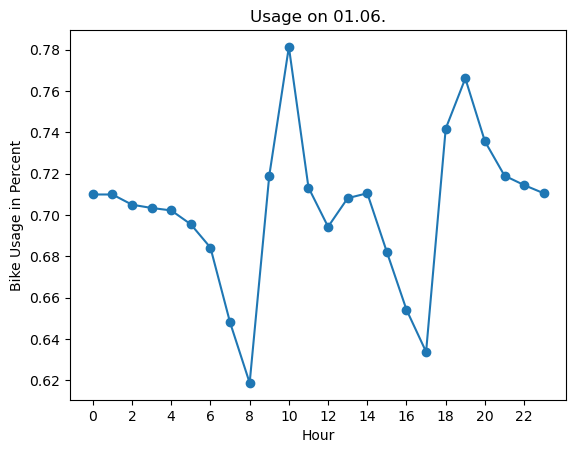

In [28]:
plt.plot(result,marker='o')
plt.xticks(ticks = range(0,24,2));
plt.xlabel('Hour');
plt.ylabel('Bike Usage in Percent');
plt.title('Usage on 01.06.');
plt.savefig('figures/KPI_1.jpeg', dpi=300, format='jpeg')

# KPI 2: Bike demand per hour for each User Type

In [8]:
agg_subscriber_kpi

,day_name,month,day,hour,demand
0,Friday,1,5,0,7
1,Friday,1,5,1,2
2,Friday,1,5,2,1
3,Friday,1,5,4,4
4,Friday,1,5,5,17
...,...,...,...,...,...
8278,Wednesday,12,26,19,117
8279,Wednesday,12,26,20,110
8280,Wednesday,12,26,21,80
8281,Wednesday,12,26,22,59


In [9]:
# Subscriber Demand for the 01.06.
agg_subscriber_demand_0106 = agg_subscriber_kpi[
                                        ((agg_subscriber_kpi['day'] == 1) & (agg_subscriber_kpi['month'] == 6))
                                                           ]
agg_subscriber_demand_0106 = agg_subscriber_demand_0106.reset_index(drop =True) 
agg_subscriber_demand_0106

,day_name,month,day,hour,demand
0,Friday,6,1,0,31
1,Friday,6,1,1,10
2,Friday,6,1,2,3
3,Friday,6,1,3,2
4,Friday,6,1,4,7
5,Friday,6,1,5,41
6,Friday,6,1,6,122
7,Friday,6,1,7,359
8,Friday,6,1,8,713
9,Friday,6,1,9,574


In [10]:
agg_customer_kpi

,day_name,month,day,hour,demand
0,Friday,1,5,2,3
1,Friday,1,5,5,1
2,Friday,1,5,6,3
3,Friday,1,5,7,7
4,Friday,1,5,8,15
...,...,...,...,...,...
7625,Wednesday,12,26,19,30
7626,Wednesday,12,26,20,11
7627,Wednesday,12,26,21,3
7628,Wednesday,12,26,22,8


In [11]:
# Customer Demand for the 01.06.
agg_customer_demand_0106 = agg_customer_kpi[
                                        ((agg_customer_kpi['day'] == 1) & (agg_customer_kpi['month'] == 6))
                                                           ]
agg_customer_demand_0106 = agg_customer_demand_0106.reset_index(drop =True) 
agg_customer_demand_0106

,day_name,month,day,hour,demand
0,Friday,6,1,0,3
1,Friday,6,1,1,1
2,Friday,6,1,2,1
3,Friday,6,1,3,1
4,Friday,6,1,5,4
5,Friday,6,1,6,8
6,Friday,6,1,7,35
7,Friday,6,1,8,54
8,Friday,6,1,9,45
9,Friday,6,1,10,49


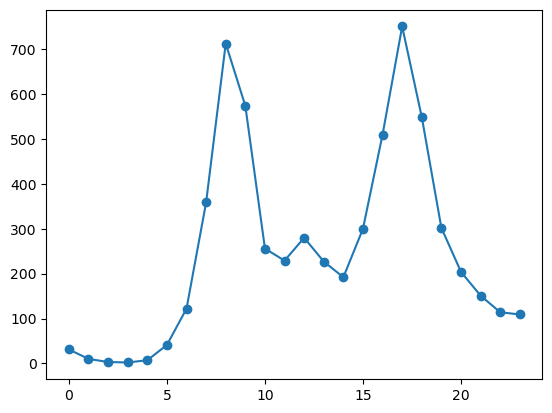

In [12]:
plt.plot(agg_subscriber_demand_0106['demand'],marker='o', label="Subscriber");

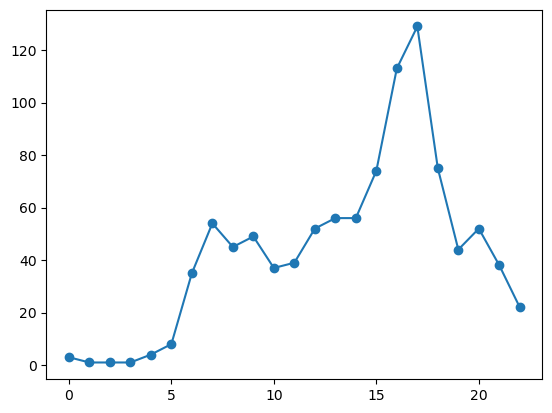

In [13]:
plt.plot(agg_customer_demand_0106['demand'],marker='o', label="Customer");

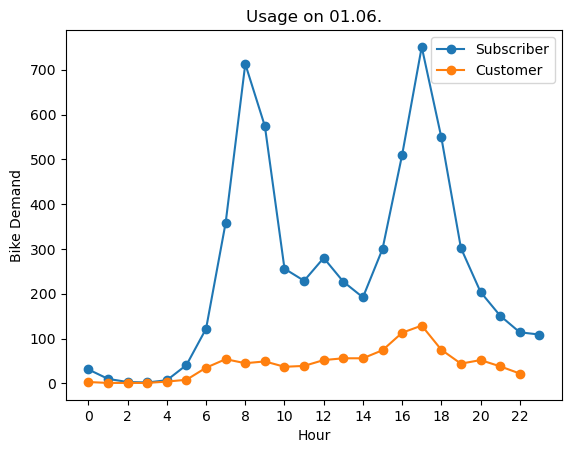

In [30]:
plt.plot(agg_subscriber_demand_0106['demand'],marker='o', label="Subscriber")
plt.plot(agg_customer_demand_0106['demand'],marker='o', label="Customer")

plt.xticks(ticks = range(0,24,2));
plt.xlabel('Hour');
plt.ylabel('Bike Demand');
plt.legend()
plt.title('Usage on 01.06.');
plt.savefig('figures/KPI_2.jpeg', dpi=300, format='jpeg')

# KPI 3: Bike Demand at the most/least used Stations

In [34]:
# Demand an Top Stationen/ Bot Stationen pro Stunde am 01.06
# Drop unnecessary columns
Bike_start = df_bikes.groupby('start_station_id').describe()
Bike_start = Bike_start.drop( [('end_station_id','std'),('end_station_id','mean'),('end_station_id','min'),('end_station_id','25%'),('end_station_id','50%'),('end_station_id','75%'),('end_station_id','max'),'bike_id'], axis=1)
Bike_start = Bike_start.sort_values(by = ('end_station_id','count') , ascending = False)

# Top 5 most used Stations
Bike_start_Top = Bike_start[Bike_start["end_station_id","count"] > 33500]
Bike_start_Top

end_station_id     year                                       \
                          count    count    mean  std     min     25%     50%   
start_station_id                                                                
15.0                    38461.0  38461.0  2018.0  0.0  2018.0  2018.0  2018.0   
67.0                    37617.0  37617.0  2018.0  0.0  2018.0  2018.0  2018.0   
30.0                    35092.0  35092.0  2018.0  0.0  2018.0  2018.0  2018.0   
58.0                    34918.0  34918.0  2018.0  0.0  2018.0  2018.0  2018.0   
81.0                    33716.0  33716.0  2018.0  0.0  2018.0  2018.0  2018.0   

                                    month  ...   day           hour  \
                     75%     max    count  ...   75%   max    count   
start_station_id                           ...                        
15.0              2018.0  2018.0  38461.0  ...  24.0  31.0  38461.0   
67.0              2018.0  2018.0  37617.0  ...  23.0  31.0  37617.0   
30.0              2018.0  2018.0  35092.0  ...  23.0  31.0  35092.0   
58.0              2018.0  2018.0  34918.0  ...  23.0  31.0  34918.0   
81.0              2018.0  2018.0  33716.0  ...  23.0  31.0  33716.0   

                                                                   
                       mean       std  min  25%   50%   75%   max  
start_station_id                                                   
15.0              12.410702  4.414728  0.0  8.0  12.0  16.0  23.0  
67.0              11.704070  4.730918  0.0  8.0   9.0  17.0  23.0  
30.0              12.319816  4.764015  0.0  8.0  10.0  17.0  23.0  
58.0              13.622458  4.583759  0.0  9.0  14.0  17.0  23.0  
81.0              13.176919  4.519779  0.0  9.0  13.0  17.0  23.0  

[5 rows x 33 columns]

In [16]:
# Top 25 least used stations
Bike_start_Bot = Bike_start[Bike_start["end_station_id","count"] < 1020]
Bike_start_Bot

,end_station_id
,count
start_station_id,
219.0,983.0
206.0,974.0
377.0,971.0
306.0,959.0
368.0,955.0
...,...
301.0,93.0
359.0,91.0


## A little data prep

In [17]:
# Split datetime into year, month, day, day_name and hour columns
df_bikes['year'] = pd.to_datetime(df_bikes['start_time']).dt.year
df_bikes['month'] = pd.to_datetime(df_bikes['start_time']).dt.month
df_bikes['day'] = pd.to_datetime(df_bikes['start_time']).dt.day
df_bikes['hour'] = pd.to_datetime(df_bikes['start_time']).dt.hour
df_bikes['day_name'] = pd.to_datetime(df_bikes['start_time'], format='%Y-%m-%d %H:%M:%S').dt.day_name()


In [18]:
# filter relevant columns
demand_stations = df_bikes.filter(['start_station_id','day_name', 'month','day','hour', 'user_type'], axis=1)
demand_stations

,start_station_id,day_name,month,day,hour,user_type
0,120.0,Wednesday,1,31,22,Subscriber
1,15.0,Wednesday,1,31,16,Customer
2,304.0,Wednesday,1,31,14,Customer
3,75.0,Wednesday,1,31,14,Customer
4,74.0,Wednesday,1,31,19,Subscriber
...,...,...,...,...,...,...
1851945,345.0,Saturday,12,1,0,Subscriber
1851946,10.0,Saturday,12,1,0,Subscriber
1851947,245.0,Saturday,12,1,0,Subscriber
1851948,93.0,Saturday,12,1,0,Subscriber


In [19]:
agg_demand_stations = demand_stations.groupby(['start_station_id','day_name','month', 'day', 'hour']).user_type.agg('count').to_frame('demand').reset_index()
agg_demand_stations

,start_station_id,day_name,month,day,hour,demand
0,3.0,Friday,1,5,5,1
1,3.0,Friday,1,5,7,1
2,3.0,Friday,1,5,8,4
3,3.0,Friday,1,5,9,7
4,3.0,Friday,1,5,10,4
...,...,...,...,...,...,...
761392,381.0,Wednesday,12,12,17,1
761393,381.0,Wednesday,12,12,23,1
761394,381.0,Wednesday,12,19,8,1
761395,381.0,Wednesday,12,19,9,2


## KPI for example Date 01.06

In [20]:
# View Data for the example Date 01.06
agg_demand_stations_0106 = agg_demand_stations[
                                        ((agg_demand_stations['day'] == 1) & (agg_demand_stations['month'] == 6))
                                                           ]
agg_demand_stations_0106 = agg_demand_stations_0106.reset_index(drop =True) 
agg_demand_stations_0106

,start_station_id,day_name,month,day,hour,demand
0,3.0,Friday,6,1,2,1
1,3.0,Friday,6,1,6,1
2,3.0,Friday,6,1,7,3
3,3.0,Friday,6,1,8,10
4,3.0,Friday,6,1,9,6
...,...,...,...,...,...,...
2574,350.0,Friday,6,1,18,1
2575,350.0,Friday,6,1,19,2
2576,350.0,Friday,6,1,20,1
2577,350.0,Friday,6,1,21,2


In [21]:
# get a list of Station Id
Station_ids_0106 = agg_demand_stations_0106['start_station_id'].unique().tolist()

Data_station_0106 = {}
for Id in Station_ids_0106:
    Data_station_0106[Id] = agg_demand_stations_0106[agg_demand_stations_0106['start_station_id'] == Id]

In [22]:
for Id in Station_ids_0106:
    Data_station_0106[Id] = Data_station_0106[Id].set_index('hour')

In [23]:
Data_station_0106[3]

,start_station_id,day_name,month,day,demand
hour,,,,,
2,3.0,Friday,6,1,1
6,3.0,Friday,6,1,1
7,3.0,Friday,6,1,3
8,3.0,Friday,6,1,10
9,3.0,Friday,6,1,6
10,3.0,Friday,6,1,3
12,3.0,Friday,6,1,5
13,3.0,Friday,6,1,7
14,3.0,Friday,6,1,2


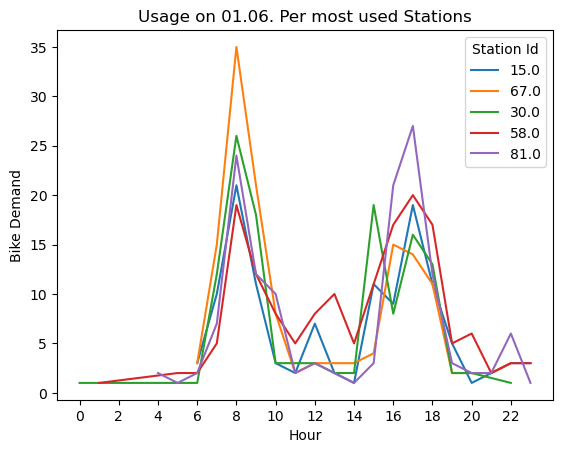

In [39]:
for Id in Bike_start_Top.index:
    plt.plot(Data_station_0106[Id]['demand'],label=Id);
plt.xticks(ticks = range(0,24,2));
plt.xlabel('Hour');
plt.ylabel('Bike Demand');
plt.legend(title = 'Station Id')
plt.title('Usage on 01.06. Per most used Stations');
plt.savefig('figures/KPI_3_top.jpeg', dpi=300, format='jpeg')

219.0
206.0
306.0
170.0
192.0
271.0
289.0
191.0
221.0
216.0
307.0
209.0
46.0
236.0
222.0
299.0
227.0
292.0
297.0
288.0
217.0
290.0
151.0
287.0
283.0
225.0
303.0
228.0
226.0
302.0
224.0


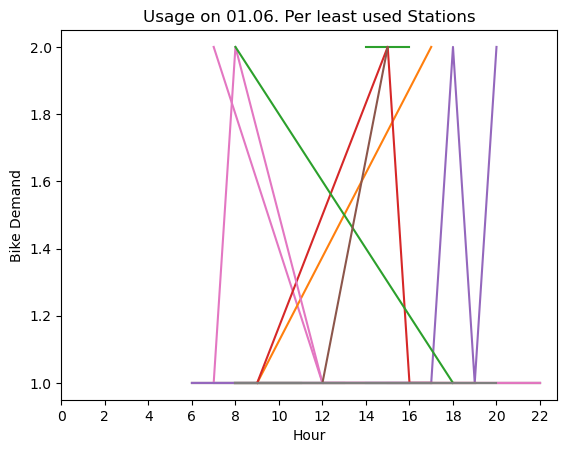

In [41]:
for Id in Bike_start_Bot.index:
    if Id in Data_station_0106:
        plt.plot(Data_station_0106[Id]['demand']);
        print(Id)
        
plt.xticks(ticks = range(0,24,2));
plt.xlabel('Hour');
plt.ylabel('Bike Demand');
plt.title('Usage on 01.06. Per least used Stations');
plt.savefig('figures/KPI_3_bot.jpeg', dpi=300, format='jpeg')